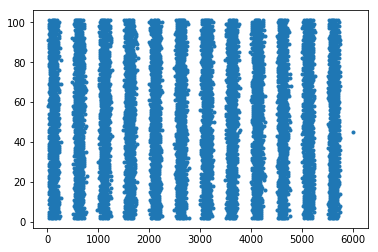

In [30]:
import nest
import matplotlib.pyplot as plt
import numpy as np

nest.ResetKernel()   # in case we run the script multiple times from iPython
nest.SetKernelStatus({'resolution': 0.01})

ac_generator = nest.Create('ac_generator', params={'amplitude' : 100.0, 'frequency' : 2.0})
neuron_nodes = nest.Create('iaf_psc_alpha', 100)
neuron_spike_detectors = nest.Create('spike_detector')
noise_generator        = nest.Create('poisson_generator', params={'rate' : 6000.0})

nest.Connect(ac_generator, neuron_nodes, conn_spec='all_to_all')
nest.Connect(noise_generator, neuron_nodes, conn_spec='all_to_all', syn_spec={'weight': 10.0, 'delay': 0.1})
nest.Connect(neuron_nodes, neuron_spike_detectors, conn_spec='all_to_all')

nest.Simulate(6000)

plt.figure()
tspk = nest.GetStatus(neuron_spike_detectors)[0]['events']['times']
nspk = nest.GetStatus(neuron_spike_detectors)[0]['events']['senders']
# print(tspk)

plt.plot(tspk, nspk, '.')
plt.show()